In [1]:
# https://translated.turbopages.org/proxy_u/en-ru.ru.a5a945b1-65ff4b80-c08c64aa-74722d776562/https/www.geeksforgeeks.org/cleaning-data-with-pyspark-python/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("work/my_data.csv", sep=",")
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [4]:
line_count = data.shape[0]
column_count = data.shape[1]
print("Всего строк: {}".format(line_count))
print("Всего колонок: {}".format(column_count))

Всего строк: 99
Всего колонок: 27


In [5]:
!pip install pyspark;

In [6]:

import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

In [7]:
MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("My pyspark") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
path = "work/my_data.csv"
df = spark.read.option("delimiter", ",").option("header", True).csv(path)
show_result = df.toPandas()
show_result.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [8]:
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: str

In [9]:
df.head(3)

[Row(legId='9ca0e81111c683bec1012473feefd28f', searchDate='2022-04-16', flightDate='2022-04-17', startingAirport='ATL', destinationAirport='BOS', fareBasisCode='LA0NX0MC', travelDuration='PT2H29M', elapsedDays='0', isBasicEconomy='False', isRefundable='False', isNonStop='True', baseFare='217.67', totalFare='248.60', seatsRemaining='9', totalTravelDistance='947', segmentsDepartureTimeEpochSeconds='1650214620', segmentsDepartureTimeRaw='2022-04-17T12:57:00.000-04:00', segmentsArrivalTimeEpochSeconds='1650223560', segmentsArrivalTimeRaw='2022-04-17T15:26:00.000-04:00', segmentsArrivalAirportCode='BOS', segmentsDepartureAirportCode='ATL', segmentsAirlineName='Delta', segmentsAirlineCode='DL', segmentsEquipmentDescription='Airbus A321', segmentsDurationInSeconds='8940', segmentsDistance='947', segmentsCabinCode='coach'),
 Row(legId='98685953630e772a098941b71906592b', searchDate='2022-04-16', flightDate='2022-04-17', startingAirport='ATL', destinationAirport='BOS', fareBasisCode='LA0NX0MC', 

In [10]:
#Detect missing values and abnormal zeroes


In [11]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,legId,string
1,searchDate,string
2,flightDate,string
3,startingAirport,string
4,destinationAirport,string
5,fareBasisCode,string
6,travelDuration,string
7,elapsedDays,string
8,isBasicEconomy,string
9,isRefundable,string


In [12]:
missing_values = {} 
for index, column in enumerate(df.columns):
     if column in df.columns:    # check string columns with None and Null values
#         missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
#         missing_values.update({column: missing_count})
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

""
0


In [13]:
#Удаление всех выбросов, где legID соответствует null

In [14]:
df = df.filter(df["legId"].isNotNull())
result_data = df.toPandas()
result_data["legId"]

0     9ca0e81111c683bec1012473feefd28f
1     98685953630e772a098941b71906592b
2     98d90cbc32bfbb05c2fc32897c7c1087
3     969a269d38eae583f455486fa90877b4
4     980370cf27c89b40d2833a1d5afc9751
                    ...               
94    115cc839ccfbd02898100fb98c7c2aba
95    b8632c8d6306eefa042de33dd303fc21
96    a5e3ac25a2a23b16e9a7c82eb3dbe5c6
97    46cab91070ddf01f23ad6d59600c2bff
98    b8227b6368a7bc1c8d83591695af18cb
Name: legId, Length: 99, dtype: object

In [ ]:
#Удаление всех выбросов, где totalTravelDistance соответствует null

In [24]:
df = df.filter(df["totalTravelDistance"].isNotNull())
result_data = df.toPandas()
result_data["totalTravelDistance"]

0      947
1      947
2      947
3      947
4      947
      ... 
88    2014
89    1948
90     725
91     725
92     725
Name: totalTravelDistance, Length: 93, dtype: object

In [ ]:
# Рассчет квартелей на основе столбца seatsRemaining
# https://stacktuts.com/how-to-find-median-and-quantiles-using-spark-in-python

In [16]:
# https://stackoverflow.com/questions/32284620/how-to-change-a-dataframe-column-from-string-type-to-double-type-in-pyspark
# Сменяем тип данных столбца
from pyspark.sql.types import *
df = df.withColumn("seatsRemaining", df["seatsRemaining"].cast(IntegerType()))
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: st

In [20]:
from pyspark.sql.functions import percentile
median = df.approxQuantile("seatsRemaining", [0.5], 0)[0]
first_quantile = df.approxQuantile("seatsRemaining", [0.25], 0)[0]
third_quantile = df.approxQuantile("seatsRemaining", [0.75], 0)[0]
print("Median:", median)
print("First Quartile:", first_quantile)
print("Third Quartile:", third_quantile)

Median: 4.0
First Quartile: 1.0
Third Quartile: 7.0


In [ ]:
# Визуализация данных
# Визуализируем столбец baseFare
# https://learn.microsoft.com/ru-ru/fabric/data-science/python-guide/python-visualizations

In [21]:
df = df.withColumn("baseFare", df["baseFare"].cast(IntegerType()))
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: integer (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: s

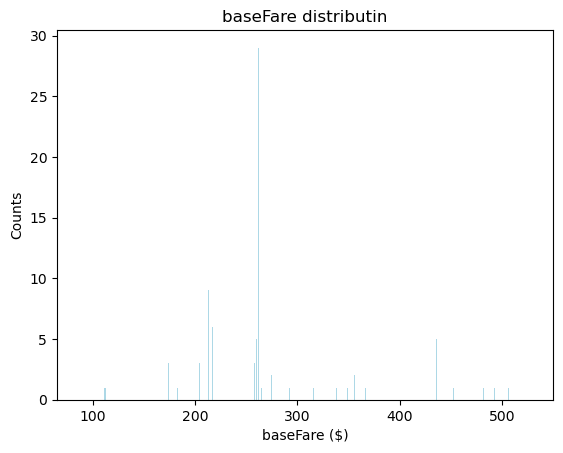

In [23]:
pandas_df = df.toPandas()

ax1 = pandas_df["baseFare"].plot(kind="hist", bins=500, facecolor='lightblue')
ax1.set_title('baseFare distributin')
ax1.set_xlabel('baseFare ($)')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

In [ ]:
# Теперь попробуем найти корреляцию между итоговой ценой и дистанцие полета (откуда мы заранее удалили все null)
# https://translated.turbopages.org/proxy_u/en-ru.ru.58f590be-65ff5fa6-7b9ed25a-74722d776562/https/www.statology.org/pyspark-correlation-between-two-columns/

In [27]:
df = df.withColumn("totalFare", df["totalFare"].cast(IntegerType()))
df = df.withColumn("totalTravelDistance", df["totalTravelDistance"].cast(IntegerType()))
df.printSchema()
print("Итоговая корреляция:")
df.stat.corr('totalFare', 'totalTravelDistance')
# Этот конкретный код вернет значение от -1 до 1, которое представляет коэффициент корреляции 
# Пирсона между столбцом1 и столбцом2.

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: integer (nullable = true)
 |-- totalFare: integer (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode:

-0.12960501397596252

In [ ]:
# Поскольку это значение отрицательное, оно говорит нам о наличии отрицательной связи между двумя переменными.